In [8]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [10]:
# 3. First look at its main features (head, shape, info).

In [11]:
display(customer_df.info())
display(customer_df.shape) # 9134 rows, 24 cols
display(customer_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

None

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [13]:
customer_df.columns = [column.lower() for column in customer_df.columns]
customer_df.columns = customer_df.columns.str.replace(" ","_")
customer_df.head(0)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


In [14]:
# 5. Change effective to date column to datetime format.

In [15]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [16]:
# 6. Define a function that differentiates between continuous and discrete variables. 
# Hint: The number of unique values might be useful. 
# Store continuous data into a continuous_df variable and do the same for discrete_df

In [17]:
## discrete variables
# Have fixed values, with clear spaces between them.
# Can be counted in whole numbers, but cannot be measured.
# Cannot be divided into smaller values to add additional accuracy.
# Are most commonly represented using bar or pie charts.

In [18]:
## continuous variables
# Can take on any value in a number line, and have no clear space between them.
# Can be measured but cannot be counted.
# Can be divided into an infinite number of smaller values that increase precision.
# Are most commonly represented using line graphs or histograms. 

In [19]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [20]:
# since this lab focuses only cleaning numerical data, I'm going to use only the numerical values from the data set
customer_df = customer_df.select_dtypes(np.number)
display(customer_df.info())
display(customer_df.head())
display(customer_df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


None

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [21]:
# continuous_df: customer_lifetime_value(8041) , income(5694) , monthly_premium_auto(202) , 
#                total_claim_amount(5106)
# discrete_df: months_since_last_claim , months_since_policy_inception , number_of_open_complaints , 
#              number_of_policies ,

# no idea how to write the function
# def cont_or_disc(df):
#     if col in df[col].nunique() > 200:
#         return discrete_df
#     else:
#         continuous_df

# thx Ferreira         
def c_d(x):
    a=pd.DataFrame()
    b=pd.DataFrame()
    for column in x:
        if len(pd.unique(x[column].values)) >= 200:
            a[column] = x[column]
        else:
            b[column] = x[column]
    return a, b 

con, dis = c_d(customer_df)

In [22]:
con
dis

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8
2,18,38,0,2
3,18,65,0,7
4,12,44,0,1
...,...,...,...,...
9129,18,89,0,2
9130,14,28,0,1
9131,9,37,3,2
9132,34,3,0,3


In [23]:
continuous_df = customer_df[['customer_lifetime_value','income',
                             'monthly_premium_auto','total_claim_amount']]


discrete_df = customer_df[['number_of_open_complaints','number_of_policies',
                          'months_since_last_claim','months_since_policy_inception']]


display(continuous_df.head())
display(discrete_df.head())

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


,number_of_open_complaints,number_of_policies,months_since_last_claim,months_since_policy_inception
0,0,1,32,5
1,0,8,13,42
2,0,2,18,38
3,0,7,18,65
4,0,1,12,44


In [24]:
# 7. Plot a correlation matrix, comment what you see.

<AxesSubplot:>

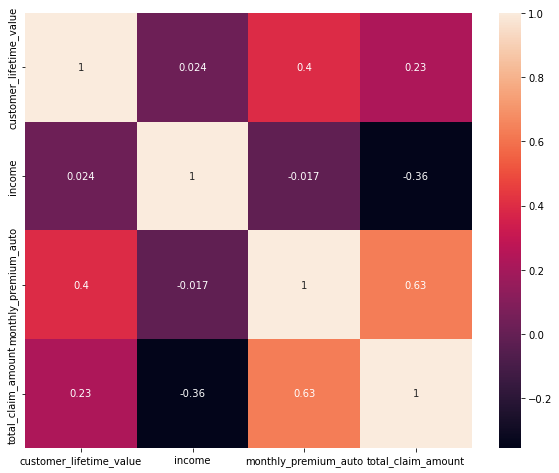

<AxesSubplot:>

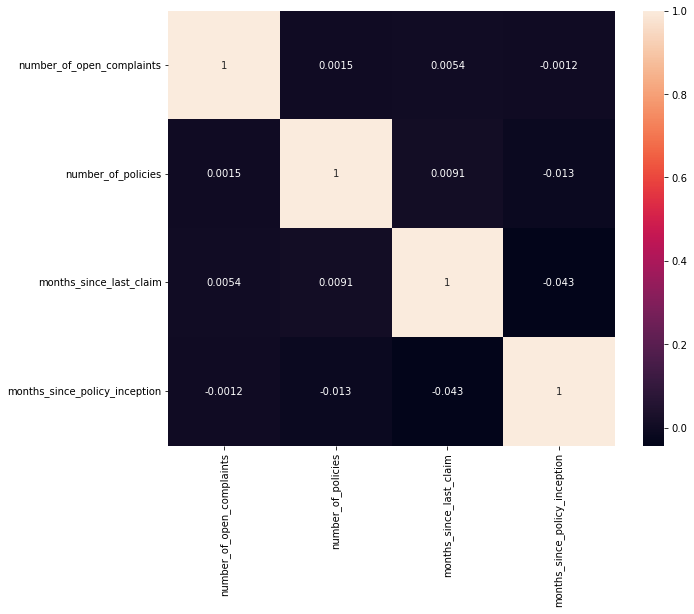

In [25]:
# display(continuous_df.corr())
fig, ax = plt.subplots(figsize=(10, 8))
ax = display(sns.heatmap(data=continuous_df.corr(),annot=True))
plt.show()

# display(discrete_df.corr())
fig, ax = plt.subplots(figsize=(10, 8))
ax = display(sns.heatmap(data=discrete_df.corr(),annot=True))
plt.show()

In [26]:
# 8. Create a function to plot every discrete variable. 
# Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)

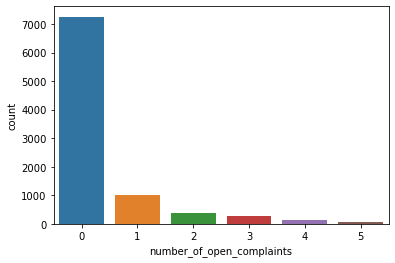

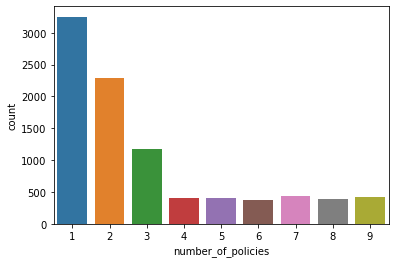

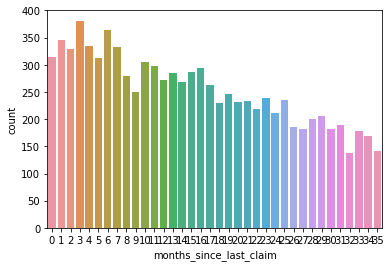

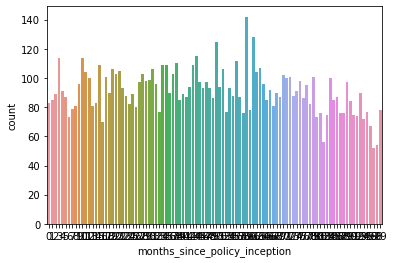

In [27]:
# pie or bar 
# fig, ax = plt.subplots(2,2,col, figsize=(12,6))
for col in discrete_df:
    sns.countplot(data=discrete_df,x=col)
    plt.show()  

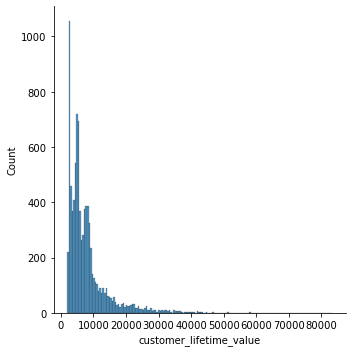

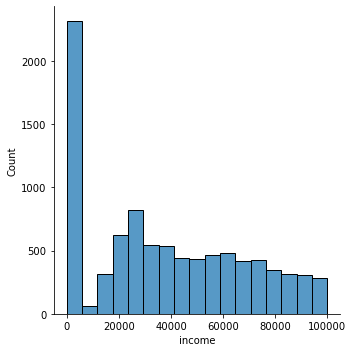

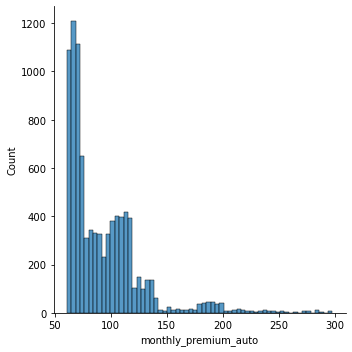

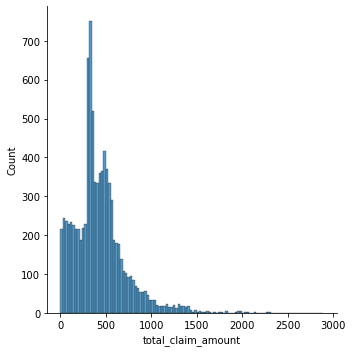

In [28]:
# line graphs or histograms
for col in continuous_df:
    sns.displot(data=continuous_df,x=col)
    plt.show()

In [29]:
# 9. Comment what you can see in the plots.

In [30]:
# continuous_df: 
## customer_lifetime_value: skewed to right, huge range -> log transform
## income: see above, large amount of ppl with no income, huge range -> log transform
## monthly_premium_auto: see above
## total_claim_amount: see above, huge range -> log transform


In [31]:
# discrete_df: 'false' numericals
## months_since_last_claim: binning might be better to get a meaningful insight
## months_since_policy_inception: see above
## number_of_open_complaints: a lot of no complaints, only a few with -> combining them is a possibility
## number_of_policies: 1-3 policies are the majority, also binning

In [32]:
# discrete_df.months_since_last_claim.value_counts()
# discrete_df.months_since_policy_inception.value_counts()
# discrete_df.number_of_open_complaints.value_counts()
# discrete_df.number_of_policies.value_counts()

In [33]:
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

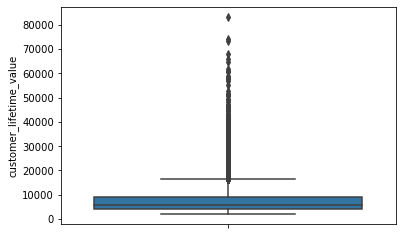

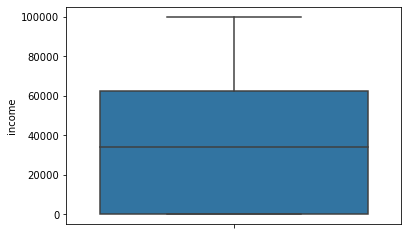

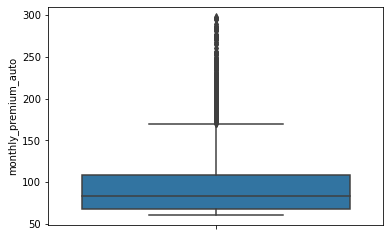

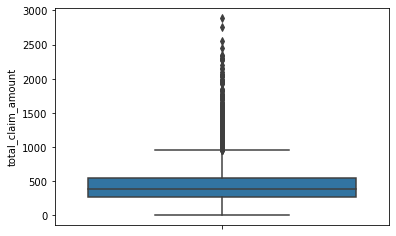

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


In [47]:
for col in continuous_df:
    sns.boxplot(data=continuous_df, y=col)
    plt.show()
continuous_df

In [35]:
# 11. Did you find outliers? Comment what you will do with them.

In [46]:
out = continuous_df[continuous_df.total_claim_amount>2500]
out = out.total_claim_amount
out.unique()
# continuous_df.info()

# I would cut them off for a more normal distribution

array([2893.239678, 2552.343856, 2759.794354])

In [209]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [106]:
customer_df.isna().sum()
# no NaN values

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64